In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

### *Basic data information can be viewed in 'Data Summary.ipynb'*
### *Evaluations inspired by others' kernel contributions*

### Orders Data Set

In [2]:
# Let's take a look at the orders data first
orders_df = pd.read_csv('input/orders.csv')

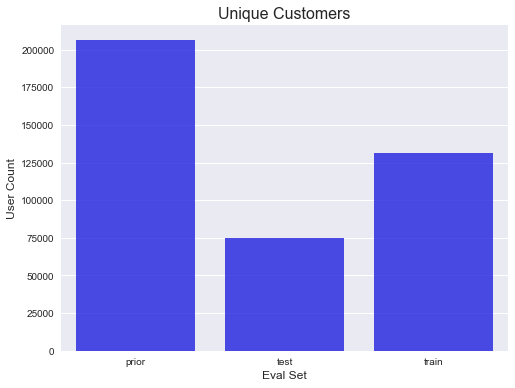

In [3]:
# Unique customers per eval_set object
user_cnt = orders_df.groupby('eval_set')['user_id'].nunique()

plt.figure(figsize=(8,6))
sns.barplot(user_cnt.index, user_cnt.values, color='b', alpha=0.8)
plt.title('Unique Customers', fontsize=16)
plt.xlabel('Eval Set', fontsize=12)
plt.ylabel('User Count', fontsize=12)
plt.show()

In [4]:
# Count of customer orders
order_cnt = orders_df.groupby('user_id')['order_number'].max().reset_index()
order_cnt = order_cnt.order_number.value_counts()
order_cnt.head(25)

4     23986
5     19590
6     16165
7     13850
8     11700
9     10190
10     9032
11     7815
12     6952
13     6236
14     5613
15     5191
16     4593
17     4139
18     3836
19     3390
20     3200
21     2921
22     2706
23     2605
24     2288
25     2186
26     2060
27     1908
28     1779
Name: order_number, dtype: int64

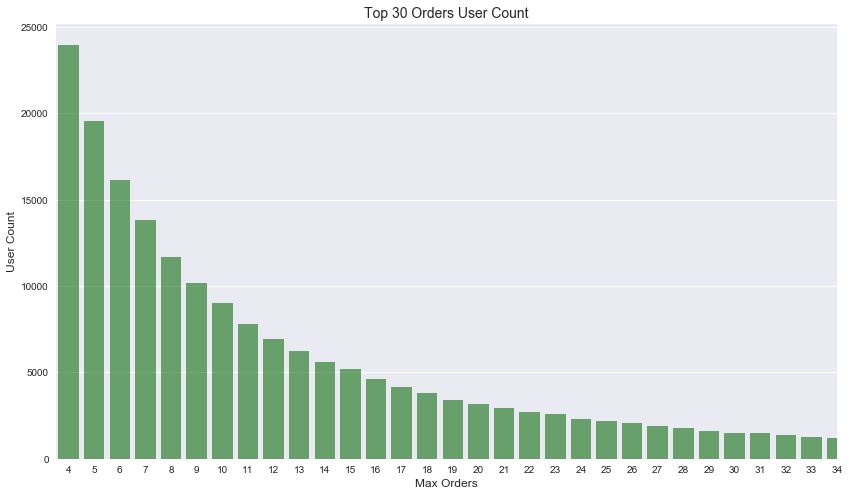

In [5]:
plt.figure(figsize=(14,8))
sns.barplot(order_cnt.index, order_cnt.values, color='g', alpha=0.6)
plt.ylabel('User Count', fontsize=12)
plt.xlabel('Max Orders', fontsize=12)
plt.title('Top 30 Orders User Count', fontsize=14)
plt.xlim(right=30)
plt.show()

In [6]:
# Order frequency by day of week
print(orders_df.groupby('order_dow')['order_number'].count())

order_dow
0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
Name: order_number, dtype: int64


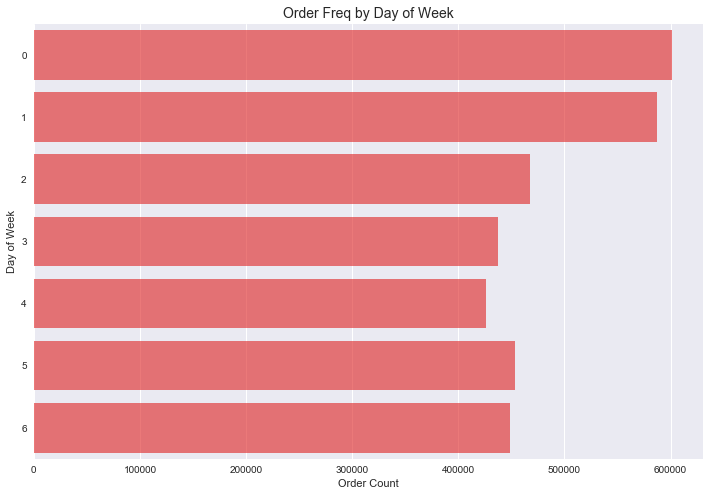

In [7]:
# Order frequency by day of week
plt.figure(figsize=(12,8))
sns.countplot(y=orders_df.order_dow, color='r', alpha=0.6)
plt.xlabel('Order Count', fontsize=11)
plt.ylabel('Day of Week', fontsize=11)
plt.title('Order Freq by Day of Week', fontsize=14)
plt.show()

In [8]:
# Order frequency by hour
print(orders_df.groupby('order_hour_of_day')['order_number'].count())

order_hour_of_day
0      22758
1      12398
2       7539
3       5474
4       5527
5       9569
6      30529
7      91868
8     178201
9     257812
10    288418
11    284728
12    272841
13    277999
14    283042
15    283639
16    272553
17    228795
18    182912
19    140569
20    104292
21     78109
22     61468
23     40043
Name: order_number, dtype: int64


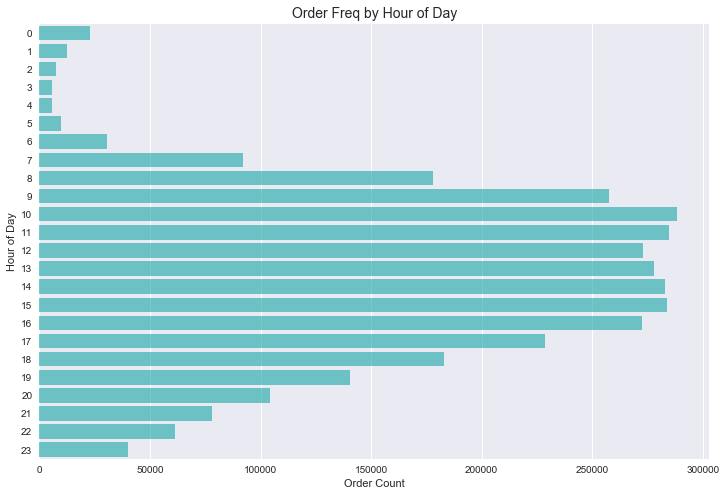

In [9]:
# Order frequency by hour
plt.figure(figsize=(12,8))
sns.countplot(y=orders_df.order_hour_of_day, color='c', alpha=0.6)
plt.xlabel('Order Count', fontsize=11)
plt.ylabel('Hour of Day', fontsize=11)
plt.title('Order Freq by Hour of Day', fontsize=14)
plt.show()

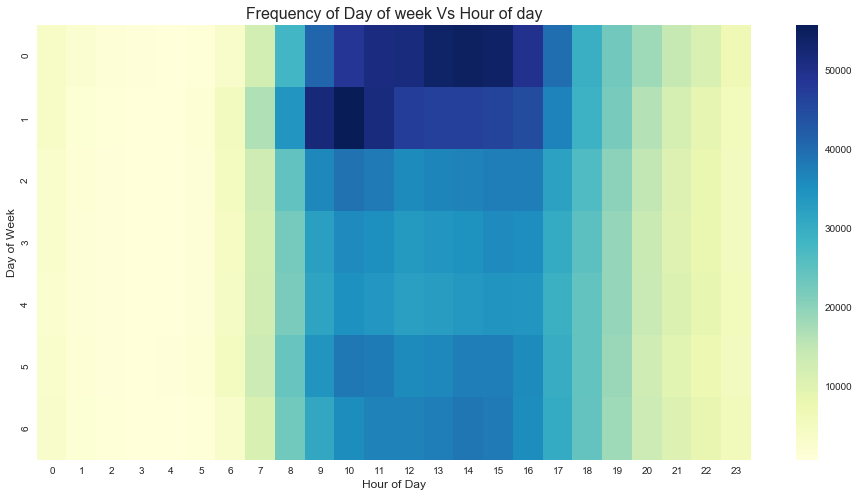

In [10]:
# Orders by day of week and hour of day
plt.figure(figsize=(16,8))
order_cnt = orders_df.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
order_cnt = order_cnt.pivot( 'order_dow', 'order_hour_of_day', 'order_number')
sns.heatmap(order_cnt, cmap='YlGnBu')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.title('Frequency of Day of week Vs Hour of day', fontsize=16)
plt.show()

** The majority of orders are placed on what is likely Saturday and Sunday between 9am and 5pm **

In [11]:
# Avg days since last order
orders_df.groupby('days_since_prior_order')['order_number'].count()

days_since_prior_order
0.0      67755
1.0     145247
2.0     193206
3.0     217005
4.0     221696
5.0     214503
6.0     240013
7.0     320608
8.0     181717
9.0     118188
10.0     95186
11.0     80970
12.0     76146
13.0     83214
14.0    100230
15.0     66579
16.0     46941
17.0     39245
18.0     35881
19.0     34384
20.0     38527
21.0     45470
22.0     32012
23.0     23885
24.0     20712
25.0     19234
26.0     19016
27.0     22013
28.0     26777
29.0     19191
30.0    369323
Name: order_number, dtype: int64

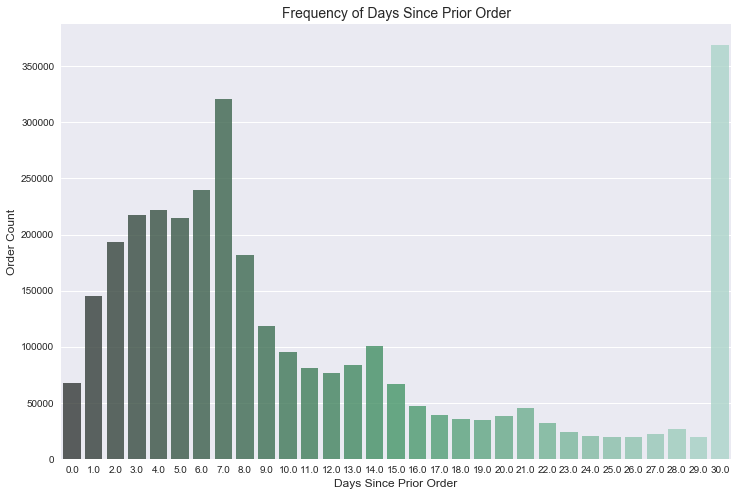

In [12]:
# Avg days since last order
plt.figure(figsize=(12,8))
sns.countplot(orders_df.days_since_prior_order, palette='BuGn_d', alpha=0.8)
plt.title('Frequency of Days Since Prior Order', fontsize=14)
plt.ylabel('Order Count', fontsize=12)
plt.xlabel('Days Since Prior Order', fontsize=12)
plt.show()

** We see a spike in weekly orders as well as occassional orders greater than 30 days. **

### Orders Prior Data Set Combined with Product, Aisle, and Department Dictionaries

In [13]:
prior_order_products_df = pd.read_csv('input/order_products__prior.csv')
products_df = pd.read_csv('input/products.csv')
aisles_df = pd.read_csv('input/aisles.csv')
departments_df = pd.read_csv('input/departments.csv')

In [14]:
products_df = pd.merge(products_df, aisles_df, on='aisle_id', how='left').merge(departments_df, on='department_id', how='left')
prior_order_products_df = pd.merge(prior_order_products_df, products_df, on='product_id', how='left')
prior_order_products_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [15]:
prod_cnts = prior_order_products_df.product_name.value_counts().head(20)
prod_cnts

Banana                      472565
Bag of Organic Bananas      379450
Organic Strawberries        264683
Organic Baby Spinach        241921
Organic Hass Avocado        213584
Organic Avocado             176815
Large Lemon                 152657
Strawberries                142951
Limes                       140627
Organic Whole Milk          137905
Organic Raspberries         137057
Organic Yellow Onion        113426
Organic Garlic              109778
Organic Zucchini            104823
Organic Blueberries         100060
Cucumber Kirby               97315
Organic Fuji Apple           89632
Organic Lemon                87746
Apple Honeycrisp Organic     85020
Organic Grape Tomatoes       84255
Name: product_name, dtype: int64

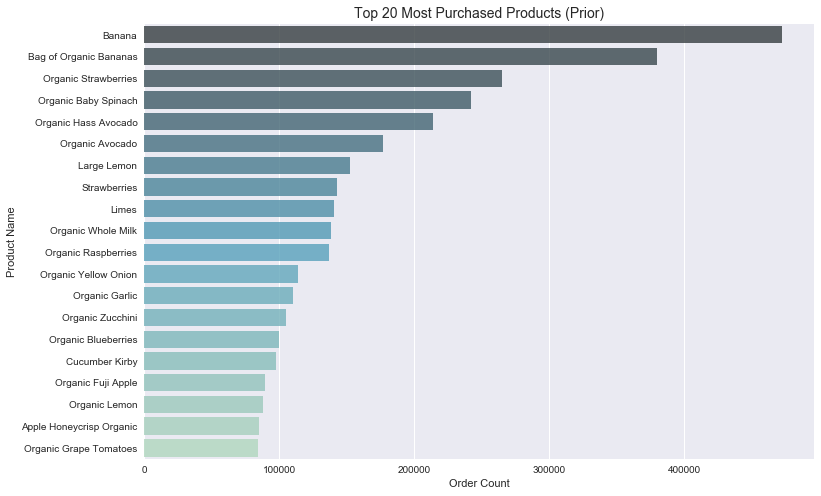

In [16]:
# Top selling products
prod_cnts = prior_order_products_df.product_name.value_counts().head(20)

plt.figure(figsize=(12,8))
sns.barplot(prod_cnts.values, prod_cnts.index, palette='GnBu_d', alpha=0.8)
plt.xlabel('Order Count', fontsize=11)
plt.ylabel('Product Name', fontsize=11)
plt.title('Top 20 Most Purchased Products (Prior)', fontsize=14)
plt.show()

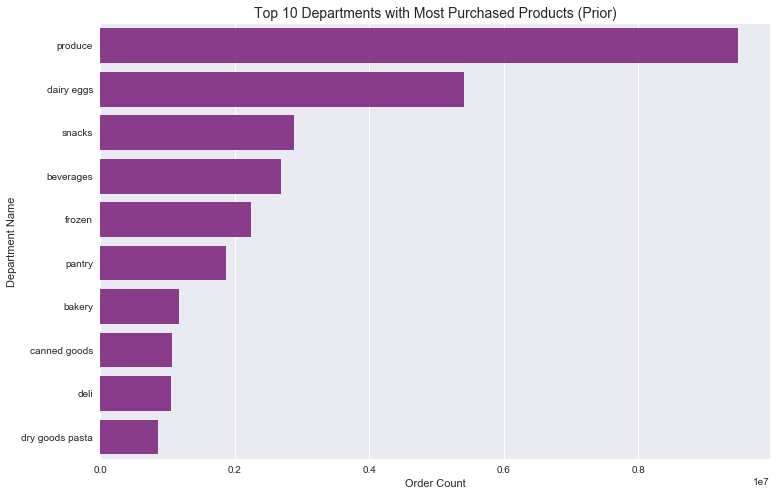

In [17]:
# Departments with most ordered products
prod_cnts = prior_order_products_df.department.value_counts().head(10)

plt.figure(figsize=(12,8))
sns.barplot(prod_cnts.values, prod_cnts.index, color='purple', alpha=0.8)
plt.xlabel('Order Count', fontsize=11)
plt.ylabel('Department Name', fontsize=11)
plt.title('Top 10 Departments with Most Purchased Products (Prior)', fontsize=14)
plt.show()

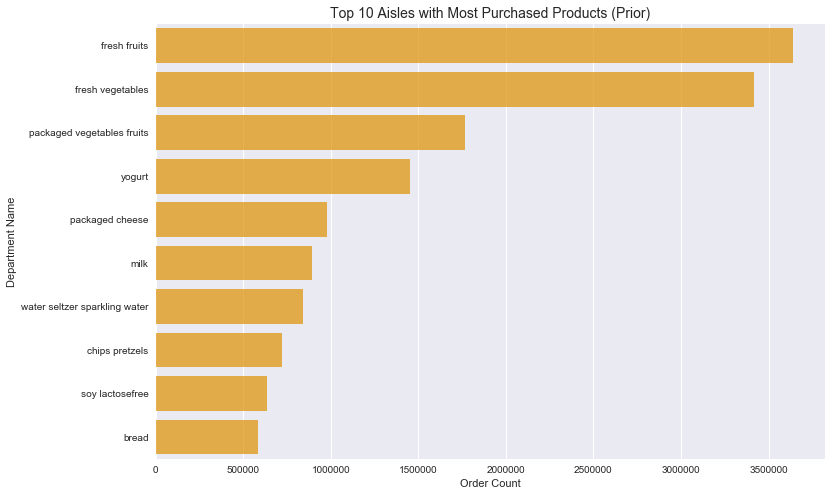

In [18]:
# Aisles with most ordered products
prod_cnts = prior_order_products_df.aisle.value_counts().head(10) 

plt.figure(figsize=(12,8))
sns.barplot(prod_cnts.values, prod_cnts.index, color='orange', alpha=0.8)
plt.xlabel('Order Count', fontsize=11)
plt.ylabel('Department Name', fontsize=11)
plt.title('Top 10 Aisles with Most Purchased Products (Prior)', fontsize=14)
plt.show()

** Produce products, led by bananas are the leading sellers **

In [19]:
# Proprotion of products that are reodered
prior_order_products_df.reordered.sum() / prior_order_products_df.count()

order_id             0.589697
product_id           0.589697
add_to_cart_order    0.589697
reordered            0.589697
product_name         0.589697
aisle_id             0.589697
department_id        0.589697
aisle                0.589697
department           0.589697
dtype: float64

In [20]:
# Products with the highest reorder rate
prior_order_products_df.groupby(['product_name'])['reordered'].mean().sort_values(ascending=False).head(25) 

product_name
Raw Veggie Wrappers                                            0.941176
Serenity Ultimate Extrema Overnight Pads                       0.931034
Orange Energy Shots                                            0.923077
Chocolate Love Bar                                             0.920792
Soy Powder Infant Formula                                      0.914286
Simply Sleep Nighttime Sleep Aid                               0.911111
Energy Shot, Grape Flavor                                      0.909091
Sparking Water                                                 0.900000
Maca Buttercups                                                0.900000
Russian River Valley Reserve Pinot Noir                        0.900000
Bars Peanut Butter                                             0.895522
Soy Crisps Lightly Salted                                      0.893939
Jet Fuel Dark Roast Whole Bean Coffee                          0.892857
High Gravity Lager                                 

** There are a variety of products that comprise some of the most popular items for reordering. **

In [21]:
# Add to cart order and average reoder rate
prior_order_products_df.groupby(['add_to_cart_order'])['reordered'].mean().sort_values(ascending=False).head(20)

add_to_cart_order
1     0.677533
2     0.676251
3     0.658037
4     0.636958
96    0.636364
5     0.617383
6     0.600420
97    0.600000
7     0.585687
8     0.573247
93    0.571429
92    0.568627
98    0.566667
9     0.561474
10    0.551018
11    0.541014
12    0.532583
13    0.524776
14    0.516375
95    0.513514
Name: reordered, dtype: float64

** It looks like the first six products added to a user's cart is above the overall reorder average of 58.9%.
I'll have to look into why products placed late in the customer's cart to have such a high reorder rate. **

### Orders Train Data Set 

In [22]:
train_order_products_df = pd.read_csv('input/order_products__train.csv')
train_order_products_df = pd.merge(train_order_products_df, products_df, on='product_id', how='left')

In [23]:
# Proprotion of products that are reodered
train_order_products_df.reordered.sum() / train_order_products_df.count()

order_id             0.598594
product_id           0.598594
add_to_cart_order    0.598594
reordered            0.598594
product_name         0.598594
aisle_id             0.598594
department_id        0.598594
aisle                0.598594
department           0.598594
dtype: float64

** The training set has a slightly higher reorder average **

In [24]:
# Products with the highest reorder rate
train_order_products_df.groupby(['product_name'])['reordered'].mean().sort_values(ascending=False).head(25)

product_name
Performance Protein Vanilla Powder                  1.0
Strawberry Banana Fruit Sandwich Bar                1.0
Strawberry 1.76 Oz Dairy Snack                      1.0
Strawberry 100 Calorie Cottage Doubles              1.0
Black Tea Chai Chocolate Tea Bags                   1.0
Onion Flavored Bissli                               1.0
Strawberry Apple Sauce Fruit Pouches                1.0
Strawberry Apple Sauce To Go Packs                  1.0
Onion Crispbread                                    1.0
Ones Dried Plums                                    1.0
One Top Tomato Pizza Sauce                          1.0
Extra Grainy Cracked Wheat & Oats Bread             1.0
Stone Ground Dijon Mustard                          1.0
Once And Done Wipes                                 1.0
On-The-Go                                           1.0
Strawberry Banana Yogurt Bars                       1.0
Strawberry Blast Fruit & Chia Seed Bar              1.0
Strawberry Blast Kid's Honest Tooth

** There a number of products that always get reodered in the training set**

In [25]:
train_order_products_df.groupby(['product_name'])['reordered'].mean().sort_values(ascending=False).head(10)

product_name
Performance Protein Vanilla Powder        1.0
Strawberry Banana Fruit Sandwich Bar      1.0
Strawberry 1.76 Oz Dairy Snack            1.0
Strawberry 100 Calorie Cottage Doubles    1.0
Black Tea Chai Chocolate Tea Bags         1.0
Onion Flavored Bissli                     1.0
Strawberry Apple Sauce Fruit Pouches      1.0
Strawberry Apple Sauce To Go Packs        1.0
Onion Crispbread                          1.0
Ones Dried Plums                          1.0
Name: reordered, dtype: float64

In [26]:
# Add to cart order and average reoder rate
train_order_products_df.groupby(['add_to_cart_order'])['reordered'].mean().head(20)

add_to_cart_order
1     0.722641
2     0.698884
3     0.667972
4     0.646935
5     0.622800
6     0.605008
7     0.588728
8     0.579349
9     0.566559
10    0.561472
11    0.548498
12    0.542594
13    0.535565
14    0.526429
15    0.519165
16    0.511229
17    0.504851
18    0.496664
19    0.494951
20    0.495194
Name: reordered, dtype: float64

** Products appear to have have similar reorder rates based on the order they are added to the cart as the prior data set.**